In [94]:
# Setup environment
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from ast import literal_eval

Ingest and Combine Sources to make 1 Movies file

In [95]:
# Read different data files into notebook
metadata = pd.read_csv("../data/movies_metadata.csv")
keywords = pd.read_csv("../data/keywords.csv")
ratings = pd.read_csv("../data/ratings_small.csv")

/var/folders/04/382s5ryn4cg90lmcyzj298g00000gn/T/ipykernel_7014/3380487667.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("../data/movies_metadata.csv")


In [96]:
# Check the shapes of all dataframes and the columns that each dataset includes
print("metadata shape:", list(metadata.shape))
print("metadata columns name:", metadata.columns)

print("ratings shape:", ratings.shape)
print("ratings columns name:", list(ratings.columns))

print("keywords shape:", keywords.shape)
print("columns name:", list(keywords.columns))

metadata shape: [45466, 24]
metadata columns name: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
ratings shape: (100004, 4)
ratings columns name: ['userId', 'movieId', 'rating', 'timestamp']
keywords shape: (46419, 2)
columns name: ['id', 'keywords']


In [97]:
# Check the column dtypes for metadata dataframe
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [98]:
# Check the column dtypes for keywords dataframe
keywords.dtypes

id           int64
keywords    object
dtype: object

In [99]:
# Check the column dtypes for ratings dataframe
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [100]:
# Filter movie metadata dataframe to include movies in Englist ONLY and non-video movies (youtube short clips)
print("metadata shape:", list(metadata.shape))
metadata = metadata[(metadata.original_language == "en") & (metadata.video == False) & (metadata.adult == "False") & (metadata.status == "Released")]
print("metadata shape:", list(metadata.shape))


metadata shape: [45466, 24]
metadata shape: [31869, 24]


In [101]:
# Change metadata ID col to int type to merge with other datasets
metadata["id"] = metadata["id"].astype('int')

/var/folders/04/382s5ryn4cg90lmcyzj298g00000gn/T/ipykernel_7014/958338642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["id"] = metadata["id"].astype('int')


In [102]:
# Merge dataframes on the "id" col to create one movie dataframe
movies = metadata.merge(keywords, on='id')
print("movies shape:", list(movies.shape))
print("movies columns:", list(movies.columns))

movies shape: [32443, 25]
movies columns: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'keywords']


In [103]:
# Remove columns that are not necessary
movies = movies[['genres', 'id', 'overview', 'popularity', 'poster_path', 'release_date', 'runtime', 'title', 'vote_average', 'keywords']]
print("movies shape:", list(movies.shape))
print("movies columns:", list(movies.columns))


movies shape: [32443, 10]
movies columns: ['genres', 'id', 'overview', 'popularity', 'poster_path', 'release_date', 'runtime', 'title', 'vote_average', 'keywords']


In [104]:
display(movies)

,genres,id,overview,popularity,poster_path,release_date,runtime,title,vote_average,keywords
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,81.0,Toy Story,7.7,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,104.0,Jumanji,6.9,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,101.0,Grumpier Old Men,6.5,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,127.0,Waiting to Exhale,6.1,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,106.0,Father of the Bride Part II,5.7,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...
32438,"[{'id': 878, 'name': 'Science Fiction'}]",222848,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,1995-01-01,85.0,Caged Heat 3000,3.5,[]
32439,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,1991-05-13,104.0,Robin Hood,5.7,[]
32440,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,2003-08-01,90.0,Betrayal,3.8,[]
32441,[],227506,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,1917-10-21,87.0,Satan Triumphant,0.0,[]


In [105]:
# Change values in columns that are "stringified" to their original python data types (lists)
features = ['genres', 'keywords']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)
    
print(type(movies.genres[0]))

<class 'list'>


In [106]:
# Create a function to extract valuable data from list values in certain columns
def get_list_data(value):
    if isinstance(value, list):
        if not value:
            return None
        else:
            return [val['name'] for val in value]
    else:
        return []

In [107]:
# Apply get_list_data to each column with list values and return the important values
for feature in features:
    movies[feature] = movies[feature].apply(get_list_data)

In [108]:
display(movies)

,genres,id,overview,popularity,poster_path,release_date,runtime,title,vote_average,keywords
0,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,81.0,Toy Story,7.7,"[jealousy, toy, boy, friendship, friends, riva..."
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,104.0,Jumanji,6.9,"[board game, disappearance, based on children'..."
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,101.0,Grumpier Old Men,6.5,"[fishing, best friend, duringcreditsstinger, o..."
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,127.0,Waiting to Exhale,6.1,"[based on novel, interracial relationship, sin..."
4,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,106.0,Father of the Bride Part II,5.7,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...,...,...,...,...,...,...,...
32438,[Science Fiction],222848,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,1995-01-01,85.0,Caged Heat 3000,3.5,None
32439,"[Drama, Action, Romance]",30840,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,1991-05-13,104.0,Robin Hood,5.7,None
32440,"[Action, Drama, Thriller]",67758,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,2003-08-01,90.0,Betrayal,3.8,None
32441,None,227506,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,1917-10-21,87.0,Satan Triumphant,0.0,None


EDA Entire Movie Dataset

In [109]:
# Check Non-Null counts and column dtypes
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32443 entries, 0 to 32442
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        30752 non-null  object 
 1   id            32443 non-null  int64  
 2   overview      32378 non-null  object 
 3   popularity    32443 non-null  object 
 4   poster_path   32124 non-null  object 
 5   release_date  32388 non-null  object 
 6   runtime       32437 non-null  float64
 7   title         32443 non-null  object 
 8   vote_average  32443 non-null  float64
 9   keywords      23579 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.7+ MB


In [110]:
# Check rows that are missing overview values
print(movies.shape)
movies.dropna(inplace=True)
print(movies.shape)

(32443, 10)
(23262, 10)


In [111]:
# Change columns to appropriate data type
movies['popularity'] = movies['popularity'].astype("float")
movies['release_date'] = pd.to_datetime(movies.release_date)

In [112]:
# Check Non-Null counts and column dtypes after dropping rows with nulls and correcting column dtypes
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23262 entries, 0 to 32437
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        23262 non-null  object        
 1   id            23262 non-null  int64         
 2   overview      23262 non-null  object        
 3   popularity    23262 non-null  float64       
 4   poster_path   23262 non-null  object        
 5   release_date  23262 non-null  datetime64[ns]
 6   runtime       23262 non-null  float64       
 7   title         23262 non-null  object        
 8   vote_average  23262 non-null  float64       
 9   keywords      23262 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 2.0+ MB


In [113]:
display(movies)

,genres,id,overview,popularity,poster_path,release_date,runtime,title,vote_average,keywords
0,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,81.0,Toy Story,7.7,"[jealousy, toy, boy, friendship, friends, riva..."
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,104.0,Jumanji,6.9,"[board game, disappearance, based on children'..."
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,101.0,Grumpier Old Men,6.5,"[fishing, best friend, duringcreditsstinger, o..."
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,127.0,Waiting to Exhale,6.1,"[based on novel, interracial relationship, sin..."
4,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,106.0,Father of the Bride Part II,5.7,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...,...,...,...,...,...,...,...
32431,"[Fantasy, Comedy]",49271,A man rents an apartment and furnishes it in r...,0.725084,/tX3x4Jms6xqVgiet0Ei2Ks0XkAg.jpg,1909-01-01,6.0,The Devilish Tenant,6.7,"[tenant, silent film]"
32432,"[Animation, Family]",14885,"It's Halloween in the 100 Acre Wood, and Roo's...",2.568495,/yU6byKhpzHG1RFpY5PYM6mfhfU1.jpg,2005-09-13,67.0,Pooh's Heffalump Halloween Movie,5.4,"[halloween, winnie the pooh]"
32435,"[Horror, Mystery, Thriller]",84419,An unsuccessful sculptor saves a madman named ...,0.222814,/yMnq9mL5uYxbRgwKqyz1cVGCJYJ.jpg,1946-03-29,65.0,House of Horrors,6.3,"[revenge, murder, serial killer, new york city..."
32436,"[Mystery, Horror]",390959,"In this true-crime documentary, we delve into ...",0.076061,/q75tCM4pFmUzdCg0gqcOQquCaYf.jpg,2000-10-22,45.0,Shadow of the Blair Witch,7.0,[blair witch]


In [114]:
# Check / remove duplicates from dataset
print("Count with duplicates: ", movies.id.count())
movies.drop_duplicates(subset="id", keep="first", inplace=True)
print("Count without duplicates: ", movies.id.count())

Count with duplicates:  23262
Count without duplicates:  22926


In [115]:
# Check statistics for numerical columns
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,22926.0,89437.142153,106753.146081,5.0,17108.500000,42549.500000,113216.500000,464207.000000
popularity,22926.0,4.251668,7.869272,0.0,0.662413,1.991547,6.469213,547.488298
runtime,22926.0,96.235235,32.471751,0.0,86.000000,95.000000,106.000000,1256.000000
vote_average,22926.0,5.725792,1.640091,0.0,5.100000,6.000000,6.700000,10.000000


/opt/homebrew/Caskroom/miniforge/base/envs/FB/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


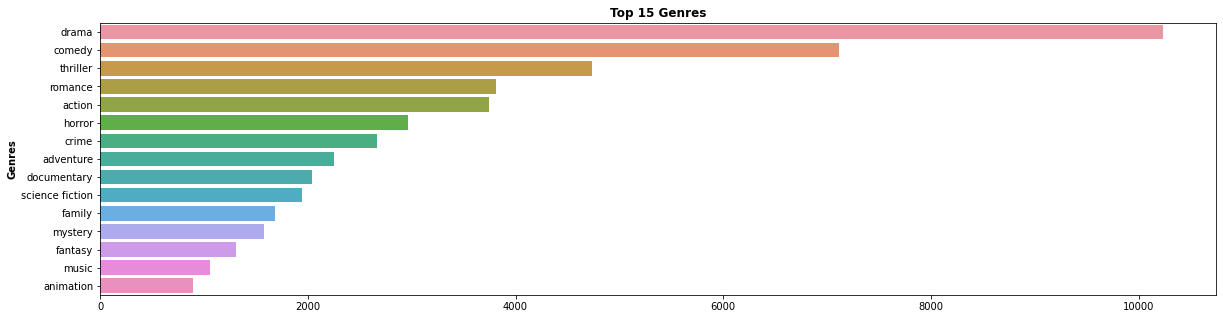

In [116]:
# Evaluate count of the top 15 Genres
from collections import Counter

genre = []
for x in movies['genres']:
    for y in x:
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:15]
x,y = map(list,zip(*count))

fig = plt.figure(figsize=(20,5))
g = sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top 15 Genres", weight = "bold")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/FB/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


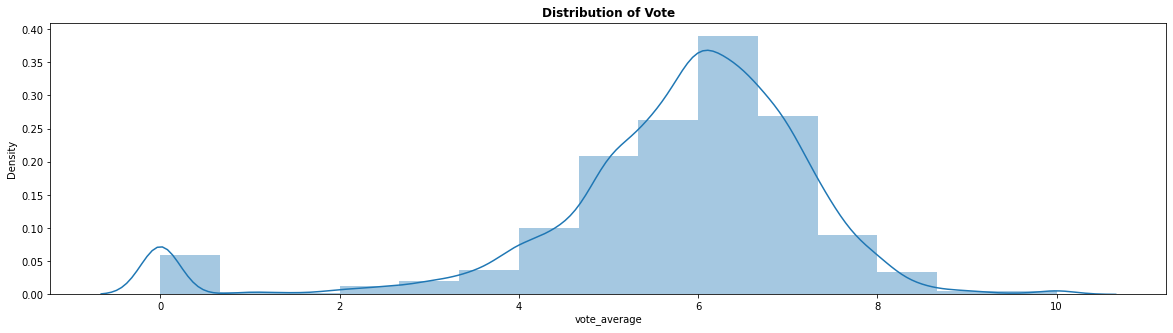

In [117]:
# Evaluate distribution of vote rating
fig = plt.figure(figsize=(20,5))
g = sns.distplot(movies['vote_average'],bins=15)
g.set_title("Distribution of Vote", weight = "bold")
plt.show()

Preprocess Data for Movie Recommendation Engine

In [118]:
movies = movies[movies.release_date > "1969-12-31"]

In [119]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    elif isinstance(x, str):
        return str.lower(x.replace(" ", ""))

In [120]:
features = ["genres", "keywords"]
for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [121]:
display(movies)

,genres,id,overview,popularity,poster_path,release_date,runtime,title,vote_average,keywords
0,"[animation, comedy, family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,81.0,Toy Story,7.7,"[jealousy, toy, boy, friendship, friends, riva..."
1,"[adventure, fantasy, family]",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,104.0,Jumanji,6.9,"[boardgame, disappearance, basedonchildren'sbo..."
2,"[romance, comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,101.0,Grumpier Old Men,6.5,"[fishing, bestfriend, duringcreditsstinger, ol..."
3,"[comedy, drama, romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,127.0,Waiting to Exhale,6.1,"[basedonnovel, interracialrelationship, single..."
4,[comedy],11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,106.0,Father of the Bride Part II,5.7,"[baby, midlifecrisis, confidence, aging, daugh..."
...,...,...,...,...,...,...,...,...,...,...
32428,"[drama, family, tvmovie]",39562,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,/w1TxeDOMS5so83bECaQECW1pV9.jpg,2007-01-08,89.0,To Be Fat Like Me,5.0,"[overweight, independentfilm, prejudice, teena..."
32429,[comedy],14008,Hyperactive teenager Kelly is enrolled into a ...,4.392389,/9sQVYo7B9cSexWXoQVzFFijCbD2.jpg,2002-03-07,101.0,Cadet Kelly,5.2,[militaryschool]
32432,"[animation, family]",14885,"It's Halloween in the 100 Acre Wood, and Roo's...",2.568495,/yU6byKhpzHG1RFpY5PYM6mfhfU1.jpg,2005-09-13,67.0,Pooh's Heffalump Halloween Movie,5.4,"[halloween, winniethepooh]"
32436,"[mystery, horror]",390959,"In this true-crime documentary, we delve into ...",0.076061,/q75tCM4pFmUzdCg0gqcOQquCaYf.jpg,2000-10-22,45.0,Shadow of the Blair Witch,7.0,[blairwitch]


In [122]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['genres'])

In [123]:
movies['soup'] = movies.apply(create_soup, axis=1)

In [124]:
display(movies)

,genres,id,overview,popularity,poster_path,release_date,runtime,title,vote_average,keywords,soup
0,"[animation, comedy, family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,81.0,Toy Story,7.7,"[jealousy, toy, boy, friendship, friends, riva...",jealousy toy boy friendship friends rivalry bo...
1,"[adventure, fantasy, family]",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,104.0,Jumanji,6.9,"[boardgame, disappearance, basedonchildren'sbo...",boardgame disappearance basedonchildren'sbook ...
2,"[romance, comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,101.0,Grumpier Old Men,6.5,"[fishing, bestfriend, duringcreditsstinger, ol...",fishing bestfriend duringcreditsstinger oldmen...
3,"[comedy, drama, romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,127.0,Waiting to Exhale,6.1,"[basedonnovel, interracialrelationship, single...",basedonnovel interracialrelationship singlemot...
4,[comedy],11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,106.0,Father of the Bride Part II,5.7,"[baby, midlifecrisis, confidence, aging, daugh...",baby midlifecrisis confidence aging daughter m...
...,...,...,...,...,...,...,...,...,...,...,...
32428,"[drama, family, tvmovie]",39562,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,/w1TxeDOMS5so83bECaQECW1pV9.jpg,2007-01-08,89.0,To Be Fat Like Me,5.0,"[overweight, independentfilm, prejudice, teena...",overweight independentfilm prejudice teenagegi...
32429,[comedy],14008,Hyperactive teenager Kelly is enrolled into a ...,4.392389,/9sQVYo7B9cSexWXoQVzFFijCbD2.jpg,2002-03-07,101.0,Cadet Kelly,5.2,[militaryschool],militaryschool comedy
32432,"[animation, family]",14885,"It's Halloween in the 100 Acre Wood, and Roo's...",2.568495,/yU6byKhpzHG1RFpY5PYM6mfhfU1.jpg,2005-09-13,67.0,Pooh's Heffalump Halloween Movie,5.4,"[halloween, winniethepooh]",halloween winniethepooh animation family
32436,"[mystery, horror]",390959,"In this true-crime documentary, we delve into ...",0.076061,/q75tCM4pFmUzdCg0gqcOQquCaYf.jpg,2000-10-22,45.0,Shadow of the Blair Witch,7.0,[blairwitch],blairwitch mystery horror


In [125]:
# Ingest values to link ratings and movies
id_map = pd.read_csv('../data/links_small.csv')[['movieId', 'tmdbId']]

In [126]:
# Add rating_id to movies dataframe to look up ratings from other users when using collaborative filtering
id_map['tmdbId'] = id_map['tmdbId'].fillna(000000).astype(int)
id_map['tmdbId'] = id_map['tmdbId'].replace(000000, np.nan)
id_map.columns = ['rating_id', 'id']
movies = movies.merge(id_map, on="id")

In [127]:
# Save cleaned movies df to data folder in repo
movies.to_csv(path_or_buf="../data/movies.csv", index=False)

EDA Ratings Dataset

/opt/homebrew/Caskroom/miniforge/base/envs/FB/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


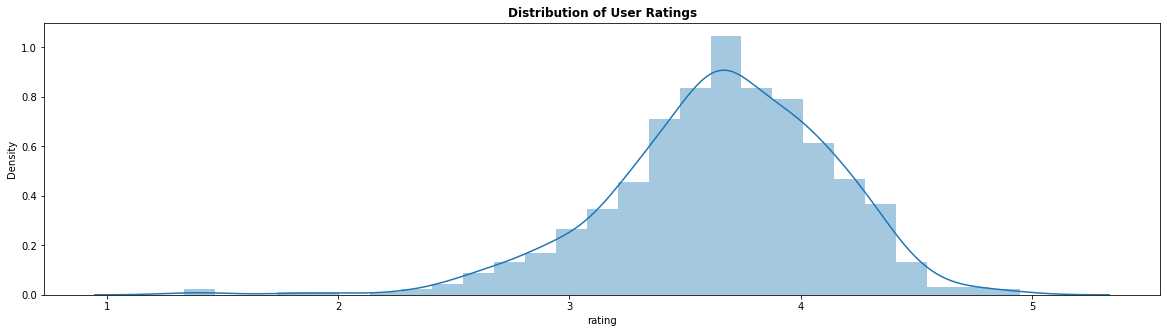

In [128]:
# Evaluate distribution of avg. user ratings
avg_user_rating = ratings.groupby("userId")["rating"].mean()

fig = plt.figure(figsize=(20,5))
g = sns.distplot(avg_user_rating)
g.set_title("Distribution of User Ratings", weight = "bold")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/FB/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


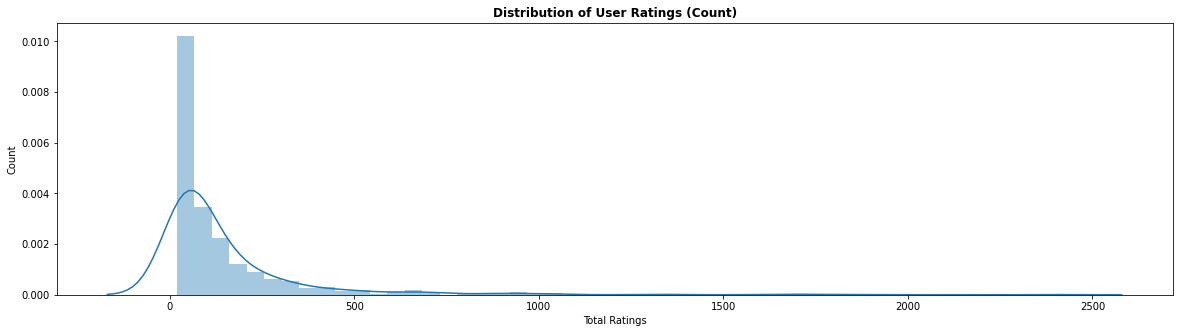

In [129]:
# Evaluate distribution of total user ratings
total_rating_count = ratings.groupby("userId")["rating"].count()

fig = plt.figure(figsize=(20,5))
g = sns.distplot(total_rating_count)
g.set_title("Distribution of User Ratings (Count)", weight = "bold")
g.set_xlabel("Total Ratings")
g.set_ylabel("Count")
plt.show()

In [130]:
# Find outliers in total count of ratings by looking at quartile ranges
total_rating_count.describe().transpose()

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: rating, dtype: float64

In [131]:
# Count the amount of outliers in ratings dataset that have rated more than 285 different movies
print("Number of users: ", ratings.userId.nunique())
print("Extreme movie raters: ", sum(total_rating_count > 285))
print(f"Extreme raters ratio: {round((sum(total_rating_count > 285) / ratings.userId.nunique()) * 100, 2)}%")

Number of users:  671
Extreme movie raters:  86
Extreme raters ratio: 12.82%
